In [2]:
import pandas as pd
import numpy as np
import seaborn as sns#data visialization library


In [3]:
df = pd.read_csv("heart_failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df = df.rename({"DEATH_EVENT":"death"}, axis=1)  #rename DEATH_EVENT column 

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.to_csv('New_heart failure.csv')  #save current csv file 

In [8]:
df.death.value_counts() 

0    203
1     96
Name: death, dtype: int64

# data visualization

<AxesSubplot:xlabel='death', ylabel='count'>

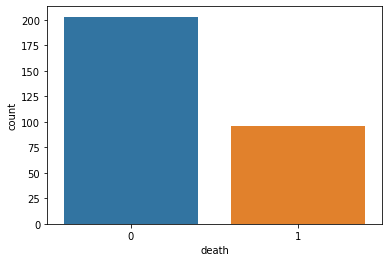

In [9]:
sns.countplot(x="death", data=df) #  x axis  respected to death attribute 

<AxesSubplot:xlabel='count', ylabel='death'>

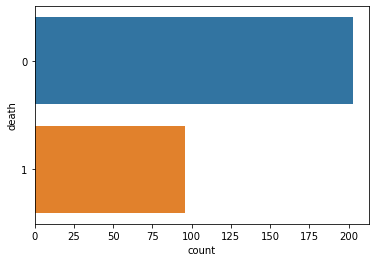

In [10]:
sns.countplot(y="death", data=df) #  y axis  represent to death attribute

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

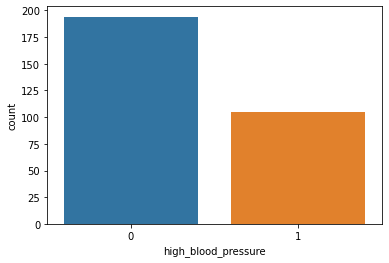

In [11]:
sns.countplot(x="high_blood_pressure", data=df)  #  x axis  represent  to high_blood_pressure attribute

# death analysis with respect to high_blood_pressure

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

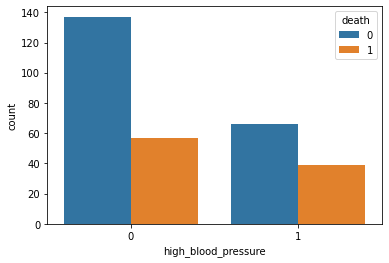

In [12]:
sns.countplot(x="high_blood_pressure", data=df, hue="death")

In [13]:
df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

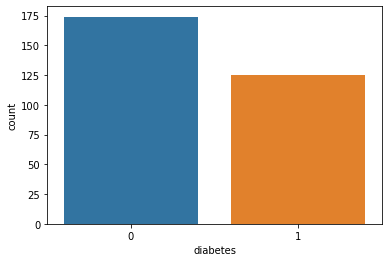

In [14]:
sns.countplot(x="diabetes", data=df)  #  x axis represent to diabetes attribute

# death analysis with respect to diabetes

<AxesSubplot:xlabel='diabetes', ylabel='count'>

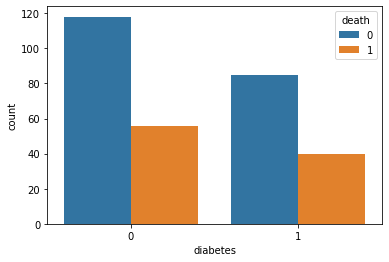

In [15]:
sns.countplot(x="diabetes", data=df, hue="death")

In [16]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

# death analysis with respect to anaemia

<AxesSubplot:xlabel='anaemia', ylabel='count'>

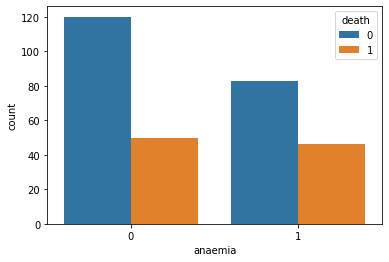

In [17]:
sns.countplot(x="anaemia", data=df, hue="death")

In [18]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [19]:
x = df.drop("death", axis=1)#seperate independent variable

In [20]:
y = df["death"]#seperate dependent variable

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: death, dtype: int64

In [22]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


# split data according to training and testing data_set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70, random_state=42)

In [25]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [26]:
ytest.shape

(90,)

In [27]:
xtest.shape

(90, 12)

# Apply dicision tree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [29]:
dt.fit(xtrain, ytrain)  # train the model with 70% of dataset,(xtrain=feature,ytrain=crossponding class of xtrain)

DecisionTreeClassifier()

In [30]:
pred = dt.predict(xtest)  #xtest predicted  corresponding to ytest

In [31]:
pred   # predicted value of y for xtest

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [32]:
import numpy as np            

np.array(ytest)  # for converting dataframe into array; # actual value of y for xtest

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

# Evaluate the model

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve, RocCurveDisplay#import library

In [34]:
print( classification_report(ytest, pred) )#comparie actual value to predicted value

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        53
           1       0.66      0.51      0.58        37

    accuracy                           0.69        90
   macro avg       0.68      0.66      0.67        90
weighted avg       0.68      0.69      0.68        90



In [35]:
print( accuracy_score(ytest, pred) )  # over all accuracy

0.6888888888888889


# represent confusion metrix

In [36]:
test_confusion_matrix = confusion_matrix(ytest, pred)   

test_confusion_matrix

array([[43, 10],
       [18, 19]], dtype=int64)

<AxesSubplot:>

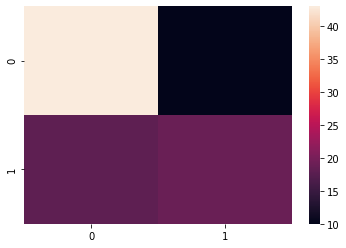

In [37]:
sns.heatmap(test_confusion_matrix)  # 2 dimentin visualization

<AxesSubplot:>

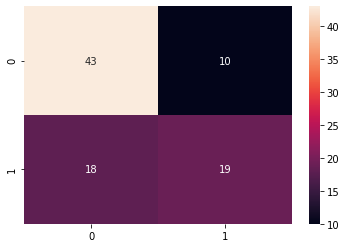

In [38]:
sns.heatmap(test_confusion_matrix, annot=True)  # annot=True, annot visiable the value

In [39]:
tp, fp, fn, tn = confusion_matrix(ytest, pred).reshape(-1)

In [40]:
tp

43

In [41]:
fp

10

In [42]:
fn

18

In [43]:
tn

19

In [44]:
print(f"tp: {tp}, fp: {fp}, fn: {fn}, tn: {tn}")

tp: 43, fp: 10, fn: 18, tn: 19


In [46]:
accuracy = (tp + tn) / (tp+tn+fp+fn)  # apply accuracy law=true event/total event

accuracy

0.6888888888888889

# ROC Curve

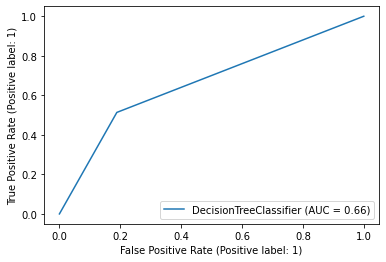

In [48]:
plot_roc_curve(dt,xtest,ytest)#dt is DecisionTreeClassifier object,xtest ytest are default parameter

In [49]:
import matplotlib.pyplot as plt

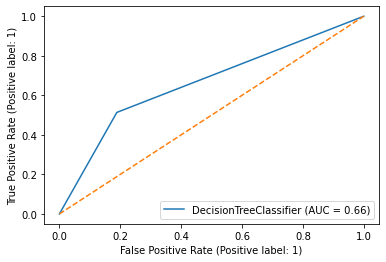

In [50]:
plot_roc_curve(dt, xtest, ytest)      # we can use from_predictions() or from_estimator()
plt.plot([0,1],[0,1],linestyle='dashed')

In [ ]:
precision=tp/(tp+fp)#ppv

In [55]:
FPR=fp/(fp+tn)#Flase Positive rate